In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics,preprocessing
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
data=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
#From the above table, we can infere that income and Mortgage features have outliers in them

In [6]:
data.shape


(5000, 14)

In [7]:
data.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
data.rename(columns = {'Personal Loan':'Personal_Loan','ZIP Code':'ZIP_Code',
                      'Securities Account':'Securities_Account','CD Account':'CD_Account'},inplace=True)

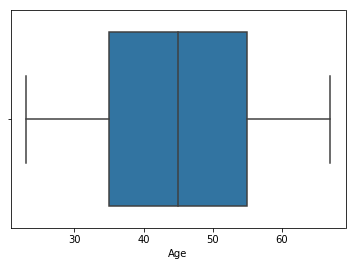

In [11]:
sns.boxplot(data['Age'])   # No outliers in Age Feature


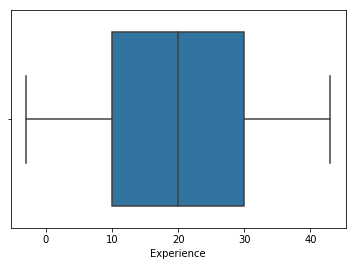

In [12]:
sns.boxplot(data['Experience'])    # No outliers in this feature


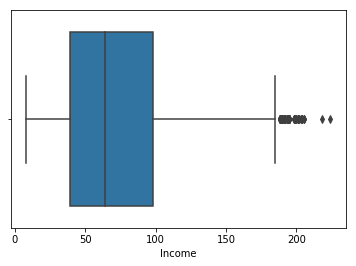

In [13]:
sns.boxplot(data['Income'])   # There are few outliers present in the Income feature. We have to treat them .


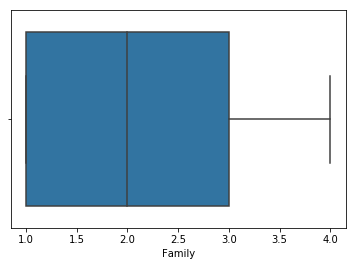

In [14]:
sns.boxplot(data['Family'])   # No outliers


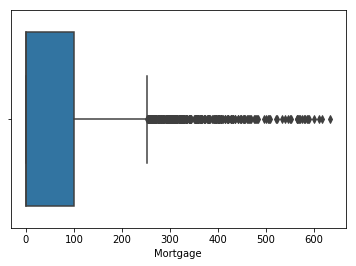

In [15]:
sns.boxplot(data['Mortgage'])   # Many outliers are present


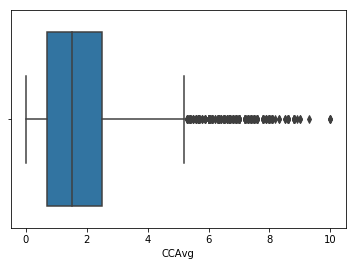

In [16]:
sns.boxplot(data['CCAvg'])    # Outliers are present


Treating the outliers present in income feature. Since Mortgage and CCAvg are important variables related to our dataset, we are not going to remove the outliers in those two features. We will treat the outliers in Income feature by capping them with upper whisker.

In [17]:
upper_whisk=data["Income"].quantile(0.75)+1.5*(data["Income"].quantile(0.75) - data["Income"].quantile(0.25))
print("upper_whisk",upper_whisk)
for i in data['Income']:
    if(i > upper_whisk):
        data['Income']=data['Income'].replace(i,upper_whisk)

upper_whisk 186.5


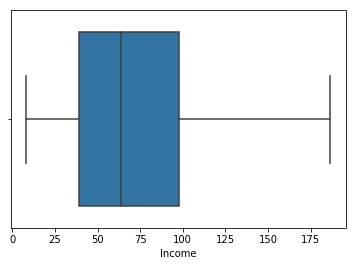

In [18]:
sns.boxplot(data['Income']) ## From the box plot we can now see that the outliers from Income feature has been treated.

In [21]:
# Dropping the ID feature and ZIP Code feature as they are unrelated to our dataset
data.drop(['ID','ZIP Code'],axis = 1, inplace=True)

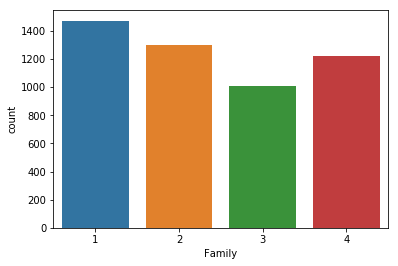

In [23]:
sns.countplot(x = data['Family'])  # From the count plot, all families have almost equal members in it.

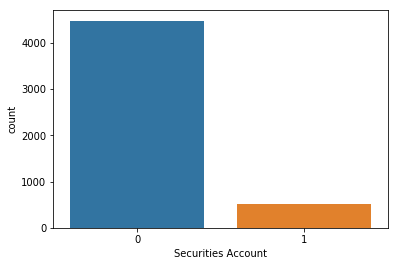

In [25]:
sns.countplot(x = data['Securities Account'])  # More number of people do not have securities account at the bank


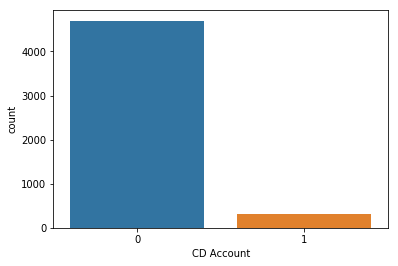

In [28]:
sns.countplot(x = data['CD Account']) # more customers have no CD account


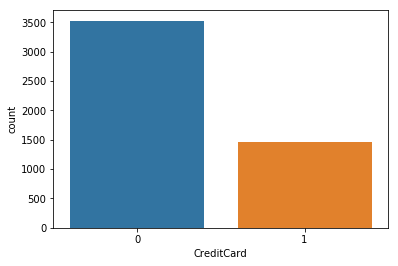

In [29]:
sns.countplot(x = data['CreditCard']) # Not many people use credit card issued by the bank


Text(0.5, 1.0, 'Personal Loan Details')

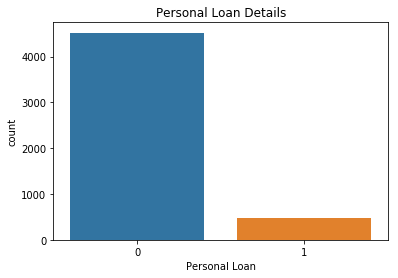

In [31]:
sns.countplot(x = data['Personal Loan'])  # From the graph, it is very clear that only very few customers get personal loan from the bank.
plt.title('Personal Loan Details')

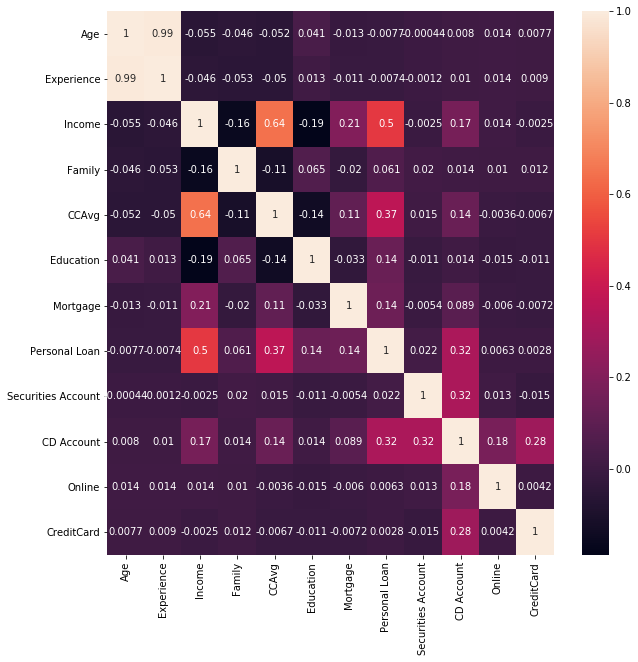

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

In [33]:
data.corr().loc['Personal Loan']


Age                  -0.007726
Experience           -0.007413
Income                0.504559
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

From the correlation map, we can infere that Income, CCAvg and CD Account are more corelated to Personal Loan and hence they are the most important features for this dataset
